# InStyle Net Promoter Score




### Questão de negócio: 

- Problema do Negocio:
    Identificar clientes satisfeitos e insatisfeitos para melhorar a experiência do cliente e aumentar a taxa de satisfação.

- Entendimento de Negócio:
Analisar os desafios enfrentados pela InStyle, como dificuldade em determinar as necessidades dos clientes, problemas de marketing e desenvolvimento, além de quedas do sistema. Identificar a importância da medição da satisfação do cliente para a reputação da empresa.

- Problema de experiência do cliente: A InStyle está enfrentando problemas de experiência do cliente. Isso pode ser devido a uma série de fatores, como falta de compreensão das necessidades dos clientes, problemas com o sistema de pagamento ou atendimento ao cliente ruim.

- Problema de escala: À medida que a InStyle cresce, ela está enfrentando problemas de escala. Isso pode ser devido a uma série de fatores, como falta de infraestrutura adequada, problemas de comunicação ou falta de coordenação entre os departamentos.

- Problema de custos: A InStyle está enfrentando problemas de custos. Isso pode ser devido a uma série de fatores, como aumento dos custos de produção, custos de marketing ou custos de atendimento ao cliente.

# Pensamento Analitico.

### Identificação da causa raíz:
• Motivação: Qual o contexto?
-  O grande desafio de escalar o faturamento de uma loja e manter a qualidade do produto e a taxa de satisfação do cliente em alta. 
-  classificar os clientes de uma planilha em “Satisfeito” ou “Neutro/Insatisfeito”
• Qual é a causa raíz do problema?
– Indentificar os clientes satisfeito e nao satisfeito.
– prevendo quais clientes ficarão Insatisfeitos e portanto agindo rápido para entender o motivo da insatisfação e reverter o cenário do cliente.
### Definir um escopo fechado para uma pergunta aberta
- No caso da InStyle, a pergunta aberta é "Como podemos melhorar a experiência do cliente?" 
- A InStyle pode definir um escopo fechado para essa pergunta definindo objetivos específicos,  
- Treinar um algoritmo para classificar os clientes de uma planilha em “Satisfeito” ou “Neutro/Insatisfeito”, prevendo quais clientes ficarão  satisfeito ou Insatisfeitos.
- Agindo rápido para entender o motivo da insatisfação e reverter o cenário do cliente 

### Definir um escopo fechado para uma pergunta aberta.
• Pergunta aberta: Como classificar clientes Satisfeito e nao saisfeito.
• Escopo fechado: Produto | Tempo | Localidade | atributo do produto.
– Treinar um modelo para classificar os clientes satisfeito e nao satisfeito.

### Quebrar o problema definido em tarefas menores. 
Tarefas:
- Metodo ciclico : Crisp DM 
As etapas de um projeto de Dados: 
- Business Question - Questão de Negócio
- Business understanding - Entendimento de Negócio.
- Data collect. - Coleta de dados.
- Data cleaning. -Limpeza de dados.
- Data exploration. Exploração de dados.
- Data modeling. - Modelagem de dados.
- Application of ML algorithms. - Aplicação dos algoritmos de ML. 
- Performance evaluation of algorithms - Avaliação de performance dos algoritmos 
- Publication of the model in Production. - Publicação do modelo em Produção.



 
### 1 Problema de Negócio.

- Identificar clientes satisfeitos e insatisfeitos para melhorar a experiência do cliente e aumentar a taxa de satisfação.

### Método SAPE na prática.

- Saída: ( Produto final )

1. A resposta para a pergunta.
Treinar 
2. Formato da entrega 
R: Arquivo .csv
3. Local da entrega
R:  Site Submision no kaggle.

- Processo ( Passo a Passo )

1. Passo a passso do crisp DM para construir:
    - Questão de Negócio
    - Entendimento de Negócio.
    - Coleta de dados.
    - Limpeza de dados.
    - Exploração de dados.
    - Modelagem de dados.
    - Aplicação dos algoritmos de ML. 
    - Avaliação de performance dos algoritmos
   
2. Definir o formato da entrega
    - site do Kaggle , criar um arquivo .csv submision
3. Decidir o local de entrega:
   - Intranet, 
   - Site kaggle 

- Entrada ( Fonte de dados )

1. Fonte de dados
    - Site da kaggle : https://www.kaggle.com/competitions/instyle-nps/overview
2. Ferramentas
    - Python 3.10.0
    - Bibliotecas 
    - Vscode com extencao jupter notebook




### Colunas
- Gender: Gênero do cliente

- Customer Type: Tipo de cliente

- Age: Idade do cliente

- Type of Purchase: O tipo de compra

- Store size: O tamanho da loja

- Store distance: Distância até o centro da cidade

- InStore wifi: Nível de satisfação com o Wifi da Loja

- Open/Close time convenient: Nível de satisfação do horário de abertura e fechamento da loja

- Easy of online shopping: Nível de satisfação com a compra online

- Store location: Nível de satisfação com a acesso a loja

- Toilet cleaning:Nível de limpeza dos banheiros

- Dressing room: Nível de satisfação com o provador

- Waiting room: Nível de satisfação do local de espera dentro da loja.

- Kids entertainment: Nível de satisfação do espaço kids

- Seller service: Nível de satisfação com o atendimento dos vendedores

- Showroom: Nível de satisfação com a disposição das roupas no interior da loja

- Self-Store: Nível de satisfação com os guarda-volumes da loja

- Purchase service: Nível de satisfação do atendimento no pagamento

- Inflights Service: Store Service

- Cleanliness: Nível de satisfação com a limpeza da loja

- Carrier delay in minutes: Tempo de atraso do produto na saída da transportadora

- Delivery delay in minutes: Tempo de atraso na entrega do produto até a casa do cliente.

### Entendimento de Negócio
    - Realizar análise detalhada do negócio, entendendo as necessidades e requisitos para a classificação de satisfação dos clientes.


# 0.0 Imports

In [1]:
# bibliotecas Necessarias

import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as sv

### 0.1  Functions

In [2]:
def show_dtypes(df):
    print(df.dtypes)
    return None

def show_dimensions(df):
    print('Number of rows: {}' .format(df.shape[0]))
    print('Number of columns: {}' .format(df.shape[1]))
    return None



# 1.0 Loading Data

In [3]:
# Coleta de dados
df_teste = pd.read_csv('dataset/test.csv')
sub_m = pd.read_csv('dataset/submission.csv')

# Carregar os dados dos clientes de uma planilha ou fonte de dados.
df_train = pd.read_csv('dataset/train.csv')

### 1.2 Data description

In [4]:
df = df_train.copy()

In [5]:
df.head()

,id,Gender,Customer Type,Age,Type of Purchase,Store size,Store distance,InStore wifi,Open/Close time convenient,Easy of online shopping,...,Kids entertainment,Seller service,Showroom,Self-Store,Purchase service,Store Service,Cleanliness,Carrier delay in minutes,Delivery delay in minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied


In [6]:
# Verificando as estatísticas básicas do conjunto de dados
df.describe()


,id,Age,Store distance,InStore wifi,Open/Close time convenient,Easy of online shopping,Store location,Toilet cleaning,Dressing room,Waiting room,Kids entertainment,Seller service,Showroom,Self-Store,Purchase service,Store Service,Cleanliness,Carrier delay in minutes,Delivery delay in minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
# Obter informações gerais sobre o dataframe, Algumas variáveis são numéricas, enquanto outras são categóricas.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          103904 non-null  int64  
 1   Gender                      103904 non-null  object 
 2   Customer Type               103904 non-null  object 
 3   Age                         103904 non-null  int64  
 4   Type of Purchase            103904 non-null  object 
 5   Store size                  103904 non-null  object 
 6   Store distance              103904 non-null  int64  
 7   InStore wifi                103904 non-null  int64  
 8   Open/Close time convenient  103904 non-null  int64  
 9   Easy of online shopping     103904 non-null  int64  
 10  Store location              103904 non-null  int64  
 11  Toilet cleaning             103904 non-null  int64  
 12  Dressing room               103904 non-null  int64  
 13  Waiting room  

## 1.3 Rename columns

In [8]:
cols =['id', 'Gender', 'Customer Type', 'Age', 'Type of Purchase',
       'Store size', 'Store distance', 'InStore wifi',
       'Open/Close time convenient', 'Easy of online shopping',
       'Store location', 'Toilet cleaning', 'Dressing room', 'Waiting room',
       'Kids entertainment', 'Seller service', 'Showroom ', 'Self-Store',
       'Purchase service', 'Store Service', 'Cleanliness',
       'Carrier delay in minutes', 'Delivery delay in minutes',
       'Satisfaction']
df.columns = [col.lower().replace(' ', '_') for col in cols]  


## 1.4 Data Dimension

In [9]:
# verificando o tamanho do conjunto de dados
show_dimensions(df)

Number of rows: 103904
Number of columns: 24


### 1.5 Dtypes

In [10]:
show_dtypes(df)

id                              int64
gender                         object
customer_type                  object
age                             int64
type_of_purchase               object
store_size                     object
store_distance                  int64
instore_wifi                    int64
open/close_time_convenient      int64
easy_of_online_shopping         int64
store_location                  int64
toilet_cleaning                 int64
dressing_room                   int64
waiting_room                    int64
kids_entertainment              int64
seller_service                  int64
showroom_                       int64
self-store                      int64
purchase_service                int64
store_service                   int64
cleanliness                     int64
carrier_delay_in_minutes        int64
delivery_delay_in_minutes     float64
satisfaction                   object
dtype: object


## 1.5 Check NaN 

In [11]:
df[df['delivery_delay_in_minutes'].isna()].sample(5)

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,...,kids_entertainment,seller_service,showroom_,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
66828,37249,Male,Loyal Customer,11,Personal,Large,950,3,3,3,...,4,1,1,4,1,2,4,95,NaN,Neutral or Dissatisfaction
60433,18169,Female,Loyal Customer,45,Gift,Large,2236,2,1,1,...,2,2,2,2,2,2,2,84,NaN,Neutral or Dissatisfaction
15683,18968,Female,Loyal Customer,43,Personal,Small,448,1,5,1,...,3,3,1,3,5,3,5,4,NaN,Neutral or Dissatisfaction
62432,96264,Female,Loyal Customer,45,Personal,Medium,328,4,3,4,...,2,2,4,2,3,2,2,5,NaN,Neutral or Dissatisfaction
66428,110773,Male,disloyal Customer,26,Gift,Large,1166,3,3,3,...,4,2,5,5,4,4,4,154,NaN,Neutral or Dissatisfaction


In [12]:
# Verificando a presença de valores nulos
(df.isna().sum())#/len(df)

id                              0
gender                          0
customer_type                   0
age                             0
type_of_purchase                0
store_size                      0
store_distance                  0
instore_wifi                    0
open/close_time_convenient      0
easy_of_online_shopping         0
store_location                  0
toilet_cleaning                 0
dressing_room                   0
waiting_room                    0
kids_entertainment              0
seller_service                  0
showroom_                       0
self-store                      0
purchase_service                0
store_service                   0
cleanliness                     0
carrier_delay_in_minutes        0
delivery_delay_in_minutes     310
satisfaction                    0
dtype: int64

### 1.6 Fillout NaN

In [13]:
# Se a não há tempo na col  carrier_delay, pode significar que a compra foi presencial
# Caso seja online, adicionar a média de tempo de entrega

med = np.round(df['delivery_delay_in_minutes'].mean())
df['delivery_delay_in_minutes'] = df.apply(lambda x: 
                                            x['delivery_delay_in_minutes'] if pd.notna(x['delivery_delay_in_minutes']) else
                                            0 if x['carrier_delay_in_minutes'] == 0 else med, axis = 1)


In [14]:
df.sample(10)

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,...,kids_entertainment,seller_service,showroom_,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
77103,22518,Female,disloyal Customer,36,Gift,Small,238,1,1,1,...,3,1,1,2,2,1,3,0,0.0,Neutral or Dissatisfaction
103047,70625,Female,Loyal Customer,37,Gift,Large,817,1,1,1,...,3,3,3,3,2,3,3,0,0.0,Satisfied
22125,47517,Female,Loyal Customer,53,Personal,Medium,588,3,2,3,...,1,1,3,1,4,1,3,0,0.0,Neutral or Dissatisfaction
94787,129818,Male,Loyal Customer,42,Personal,Medium,337,1,3,1,...,3,2,5,5,4,4,3,0,0.0,Neutral or Dissatisfaction
39998,20993,Female,Loyal Customer,31,Gift,Small,851,0,0,0,...,4,5,1,1,3,1,3,134,136.0,Satisfied
84587,123575,Female,Loyal Customer,35,Gift,Large,1773,2,2,2,...,2,2,2,2,1,2,2,0,0.0,Neutral or Dissatisfaction
28101,95651,Male,disloyal Customer,36,Gift,Large,928,2,2,2,...,1,5,3,5,5,4,1,12,9.0,Neutral or Dissatisfaction
85801,8380,Male,Loyal Customer,22,Gift,Large,1522,3,2,2,...,3,4,4,2,1,2,3,0,0.0,Neutral or Dissatisfaction
45111,119182,Male,Loyal Customer,42,Gift,Large,3941,3,3,3,...,3,3,4,3,5,3,3,0,0.0,Satisfied
11347,119594,Male,Loyal Customer,32,Gift,Medium,1979,3,2,2,...,3,4,5,4,1,4,3,0,0.0,Neutral or Dissatisfaction


In [15]:
df.isna().sum()

id                            0
gender                        0
customer_type                 0
age                           0
type_of_purchase              0
store_size                    0
store_distance                0
instore_wifi                  0
open/close_time_convenient    0
easy_of_online_shopping       0
store_location                0
toilet_cleaning               0
dressing_room                 0
waiting_room                  0
kids_entertainment            0
seller_service                0
showroom_                     0
self-store                    0
purchase_service              0
store_service                 0
cleanliness                   0
carrier_delay_in_minutes      0
delivery_delay_in_minutes     0
satisfaction                  0
dtype: int64

In [16]:
# Verificar valores duplicados
df.duplicated().sum()

0

### 1.7 Change Type

In [17]:
# df['Delivery delay in minutes'] = df['Delivery delay in minutes'].astype('int')

In [18]:
# Charge delivery_delay_in_minutes type from int

df['delivery_delay_in_minutes'] = df['delivery_delay_in_minutes'].astype(np.int64)

## 1.7 Descriptive Statistical

In [19]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(exclude=['int64', 'float64'])

### 1.7.1 Numerical Atributes

In [20]:
df_num.describe()

,id,age,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom_,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.161399
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.644234
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [21]:
d1 = pd.DataFrame (df_num.min()).T
d2 = pd.DataFrame (df_num.max()).T
d3 = pd.DataFrame (df_num.max() - df_num.min()).T
d4 = pd.DataFrame (df_num.mean()).T
d5 = pd.DataFrame (df_num.median()).T
d6 = pd.DataFrame (df_num.std()).T
d7 = pd.DataFrame (df_num.skew()).T
d8 = pd.DataFrame (df_num.kurt()).T

df_num = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8]).T.reset_index()
df_num.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'standard_deviation', 'skewness', 'kurtosis']

df_num

,attributes,min,max,range,mean,median,standard_deviation,skewness,kurtosis
0,id,1.0,129880.0,129879.0,64924.210502,64856.5,37463.812252,0.002864,-1.198440
1,age,7.0,85.0,78.0,39.379706,40.0,15.114964,-0.004516,-0.719568
2,store_distance,31.0,4983.0,4952.0,1189.448375,843.0,997.147281,1.109466,0.268535
3,instore_wifi,0.0,5.0,5.0,2.729683,3.0,1.327829,0.040408,-0.846170
4,open/close_time_convenient,0.0,5.0,5.0,3.060296,3.0,1.525075,-0.334399,-1.037767
5,easy_of_online_shopping,0.0,5.0,5.0,2.756901,3.0,1.398929,-0.018294,-0.910346
6,store_location,0.0,5.0,5.0,2.976883,3.0,1.277621,-0.058889,-1.030283
7,toilet_cleaning,0.0,5.0,5.0,3.202129,3.0,1.329533,-0.151279,-1.145453
8,dressing_room,0.0,5.0,5.0,3.250375,3.0,1.349509,-0.453852,-0.702006
9,waiting_room,0.0,5.0,5.0,3.439396,4.0,1.319088,-0.482775,-0.925702


### 1.7.2 Categorical Atributes

In [22]:
df_cat.head()

,gender,customer_type,type_of_purchase,store_size,satisfaction
0,Male,Loyal Customer,Personal,Small,Neutral or Dissatisfaction
1,Male,disloyal Customer,Gift,Large,Neutral or Dissatisfaction
2,Female,Loyal Customer,Gift,Large,Satisfied
3,Female,Loyal Customer,Gift,Large,Neutral or Dissatisfaction
4,Male,Loyal Customer,Gift,Large,Satisfied


In [23]:
# Gender
df_cat[['gender', 'customer_type']].groupby('gender').count().reset_index()

,gender,customer_type
0,Female,52727
1,Male,51177


In [24]:
# Customer Type
df_cat[['gender', 'customer_type']].groupby('customer_type').count().reset_index()

,customer_type,gender
0,Loyal Customer,84923
1,disloyal Customer,18981


In [25]:
# Type of Purchase
df_cat[['type_of_purchase', 'gender']].groupby('type_of_purchase').count().reset_index()

,type_of_purchase,gender
0,Gift,71655
1,Personal,32249


In [26]:
# Store Size
df_cat[['store_size', 'gender']].groupby('store_size').count().reset_index()

,store_size,gender
0,Large,49665
1,Medium,46745
2,Small,7494


In [27]:
# satisfaction
df_cat[['satisfaction', 'gender']].groupby('satisfaction').count().reset_index()

,satisfaction,gender
0,Neutral or Dissatisfaction,58879
1,Satisfied,45025


## 2.0 Feature Engineering

In [28]:
df1 = df.copy()

### 2.1 Flipebook

* Canal de Aquisição: 
    - Refere-se à forma como os visitantes, clientes ou usuários encontram informações sobre a empresa.
    - Isso pode incluir anúncios pagos, resultados de busca orgânica em motores de busca como o Google, 
      promoções em redes sociais, ou até m  esmo visitas físicas a pontos de venda.

* Táticas de Vendas: 
  - Essas são estratégias utilizadas pela empresa para convencer os visitantes ou usuários a se tornarem clientes. 
  - Isso pode envolver diferentes abordagens, como oferecer promoções de compra única, descontos especiais, incentivos  para    compras adicionais, entre outros.

* Modelo de Receita: 
    Refere-se à forma como a empresa gera receita com os visitantes, usuários ou clientes. Isso pode incluir v endas únicas, assinaturas recorrentes, revenda de produtos, entre outros modelos de negócios.

* Tipo de Produto: 
 - Descreve o que a empresa oferece em troca do valor monetário. Pode ser tanto produtos tangíveis, como bens f ísicos que são - vendidos ou revendidos, quanto serviços intangíveis que são prestados aos clientes.

* Modelo de Entrega: 
- Indica como o produto ou serviço chega ao cliente. Isso pode envolver a entrega física dos produtos, a entrega digital de   produtos digitais, como downloads, ou até mesmo serviços de entrega para setores como alimentos e comércio eletrônico.

Esses aspectos são essenciais para entender como uma empresa opera, desde como atrai os clientes até como gera receita e entrega seus produtos ou serviços. Cada empresa pode ter estratégias e abordagens específicas para cada um desses aspectos, dependendo do seu modelo de negócio e da indústria em que está inserida.


| Aspecto | Descrição | Opções | Exemplos |  |
| --- | --- | --- | --- | --- |
| Canal de Aquisição | Como o visitante, cliente ou usuário encontra sobre a sua empresa. | Anúncios Pagos | Anúncios Patrocinados do Google |  |
|  |  | Motor de Busca | Buscar orgânicas, aquelas que não são pagas para aparecer. Ex. pesquisas do google. |  |
|  |  | Redes sociais | Anúncios no Instagram, Facebook, etc. |  |
|  |  | Lojas | Pontos Físicos |  |
| Táticas de Vendas | O que a sua empresa faz para convencer o visitante ou usuário a se tornar um cliente. | Compra única. | Compra individual de um produto ( Mercado ). |  |
|  |  | Descontos e incentivos | x% de desconto, compre x e leve y, segunda unidade com x% de desconto. |  |
| Modelo de Receita | Como a empresa faz dinheiro dos seus visitantes usuários ou clientes | Compra uma única vez | Casas, apartamentos por exemplo |  |
| Tipo de Produto | O que a sua empresa faaz em troca do valor monetário. Podem ser produtos ou serviços. | Revenda de produtos |  |  |
| Modelo de Entrega | Como o produto chega ao cliente | Entrega Física |  |  |

In [29]:
# Online/in person purchase
# se o valor de "delivery_delay_in_minutes" for igual a zero, isso significa que a entrega do produto foi feita imediatamente, o que indica que a compra foi presencial. Nesse caso, atribuímos o valor 0 para a coluna "online_purchase".
# Caso contrário, se o valor de "delivery_delay_in_minutes" for diferente de zero, isso indica que houve um tempo de entrega, o que sugere que a compra foi feita online. Nesse caso, atribuímos o valor 1 para a coluna "online_purchase".
df1['online_purchase'] = df1['delivery_delay_in_minutes'].apply(lambda x: 0 if x == 0 else 1 )

# 3.0 Columns Selection

In [30]:
df3 = df1.copy()

# 4.0 Exploratory data Analysis

In [31]:
df4 = df3.copy()

## 4.1 sv.analyze

In [32]:
#report = sv.analyze(df4)
#report.show_html('report.html')

## 4.2 Univariate Analysis

### 4.2.1 Numerical

In [33]:
df_num = df4.select_dtypes(include=['int64', 'float64'])

In [34]:
df_num.columns

Index(['id', 'age', 'store_distance', 'instore_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom_', 'self-store',
       'purchase_service', 'store_service', 'cleanliness',
       'carrier_delay_in_minutes', 'delivery_delay_in_minutes',
       'online_purchase'],
      dtype='object')

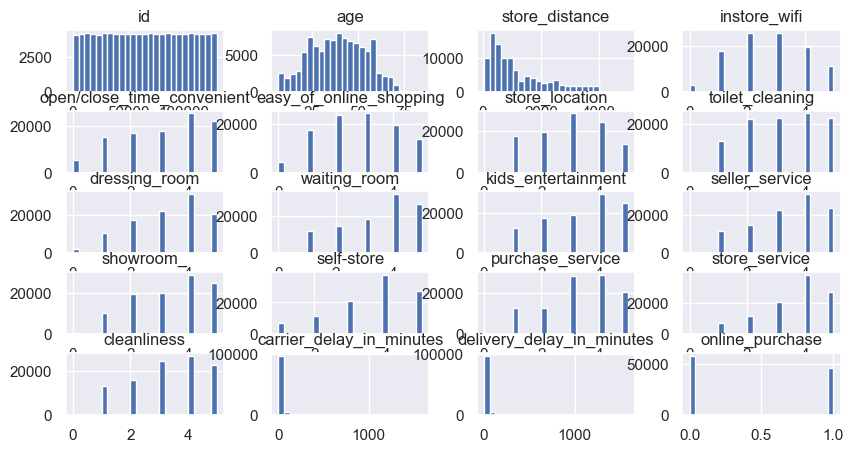

In [35]:
sns.set(rc={'figure.figsize':(10,5)})
df_num.hist(bins=25);

## 1.6. Data Balancing

In [36]:
# df[''].value_counts(normalize=True)


# EDA - Exploratory Data Analysis

In [37]:
df1 = df.copy()